# 4.9 - Intro to Data Visualization - Part 2

## Question 1: Import libraries and data

In [1]:
# Install libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create string of location
path = '/Users/aegarcia/Documents/Documents/01-2022 Instacart Basket Analysis/'

# Import Prepared data
df_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers.pkl'))

## Question 2: Create a bar chart, a histogram, a scatterplot, and a line chart (using a sample subset).

In [3]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32641268 entries, 0 to 32641267
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_time              int64   
 5   days_since_prior_order  float64 
 6   product_id              float64 
 7   add_to_cart_order       float64 
 8   reordered               float64 
 9   product_name            object  
 10  aisle_id                float64 
 11  department_id           float64 
 12  prices                  float64 
 13  price_label             object  
 14  Busy_days_by_orders     object  
 15  Busiest_period_of_day   object  
 16  max_order               int64   
 17  loyalty_flag            object  
 18  avg_price               float64 
 19  spending_flag           object  
 20  frequency_of_orders     float64 
 21  order_

## Bar Chart

<AxesSubplot:>

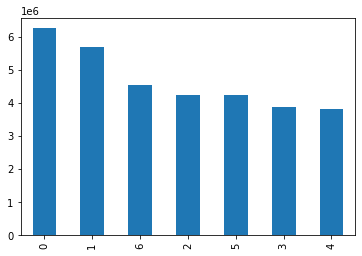

In [5]:
# Bar chart - descending order (default) 
df_merged['orders_day_of_week'].value_counts().plot.bar()

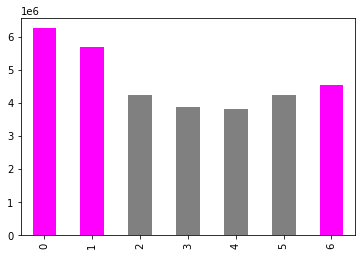

In [6]:
# Save bar graph as ab object 'bar'
bar = df_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['magenta', 'magenta', 'gray', 'gray', 'gray', 'gray', 'magenta'])
# can call ir as bar.figure

In [7]:
# Save it
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders.png'))

## Histogram

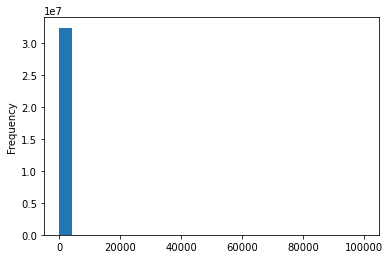

In [8]:
hist = df_merged['prices'].plot.hist(bins = 25)

In [9]:
df_merged['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [10]:
# Look for outliers - values > 100 dlls
df_merged.loc[df_merged['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
1592,912404,17,12,2,14,5.0,21553.0,5.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Chang,Female,Kansas,39,9/16/2018,3,married,150659,both
1654,603376,17,22,6,16,4.0,21553.0,3.0,1.0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Chang,Female,Kansas,39,9/16/2018,3,married,150659,both
16668,3264360,135,2,2,21,13.0,21553.0,6.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Chen,Female,Maryland,30,3/19/2017,3,married,120635,both
16674,892534,135,3,0,8,12.0,21553.0,3.0,1.0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Chen,Female,Maryland,30,3/19/2017,3,married,120635,both
54053,229704,342,8,1,19,30.0,21553.0,9.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,Non-frequent customer,Bates,Female,Minnesota,56,8/23/2018,2,married,187328,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556283,3172853,205650,18,1,9,7.0,21553.0,17.0,1.0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Vang,Male,Kentucky,62,10/2/2017,0,divorced/widowed,302526,both
32583684,2504315,205818,3,5,15,3.0,21553.0,13.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Hunter,Male,Maryland,60,7/12/2019,1,married,172539,both
32583694,1108388,205818,5,4,5,1.0,21553.0,5.0,1.0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Hunter,Male,Maryland,60,7/12/2019,1,married,172539,both
32616755,1916142,206049,1,2,17,NaN,21553.0,2.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Leal,Female,District of Columbia,23,4/26/2019,1,married,169022,both


In [11]:
# Mark values greater than 100 dlls as 'NAN' since they are incorrect
df_merged.loc[df_merged['prices'] >100, 'prices'] = np.nan

In [12]:
# Check for the new maximum value
df_merged['prices'].max()

25.0

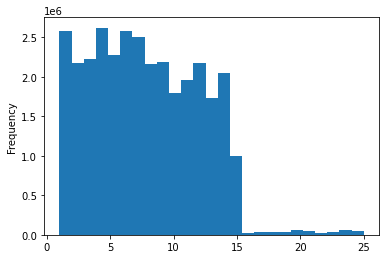

In [13]:
hist_prices = df_merged['prices'].plot.hist(bins = 25)

In [14]:
# Save it
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

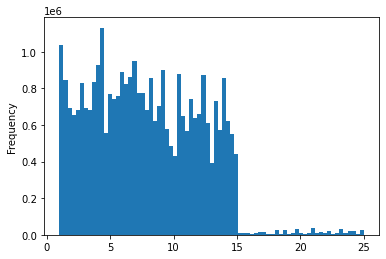

In [15]:
hist_prices_2 = df_merged['prices'].plot.hist(bins = 75)

In [16]:
# Save it
hist_prices_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices2.png'))

## Scatterplot

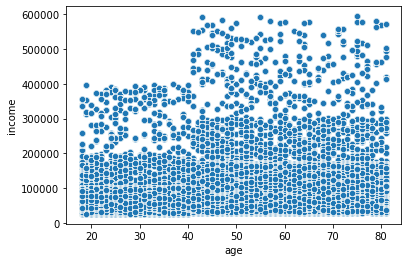

In [17]:
scatter = sns.scatterplot(x = 'age', y = 'income', data = df_merged)

In [18]:
# Save it
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_ageVSincome.png'))

## Line chart - Using sample

In [19]:
# Assign a random number and separate data 70/30
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [20]:
# Create 2 samples. big contains aprox 70% of data [0, 0.7]. 
# small contian approx 30% of data (0.7, 1].
big = df_merged[dev]
small = df_merged[~dev]

In [21]:
#Check length af all data
len(df_merged)

32641268

In [22]:
# Must be equal to both sets
len(big)+len(small)

32641268

In [23]:
# Create a 'small' sample of dataframe contining only the 2 columns needed
df_small = small[['orders_day_of_week','prices']]

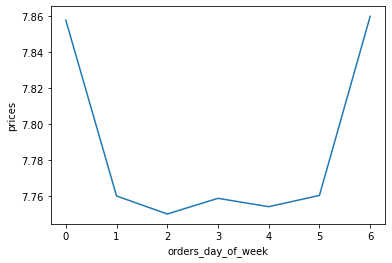

In [24]:
line = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

In [25]:
# Save it
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_prices.png'))

## Question 3: Create a histogram of the “order_hour_of_day” column.

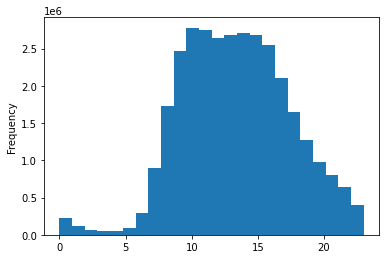

In [3]:
hist_hour = df_merged['order_time'].plot.hist(bins = 24)

In [4]:
# Save it
hist_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_time.png'))

### I found that people order all day long! Most orders occur during 'office hours' 9am - 5pm. 

## Question 4: Create a bar chart from the “loyalty_flag” column.

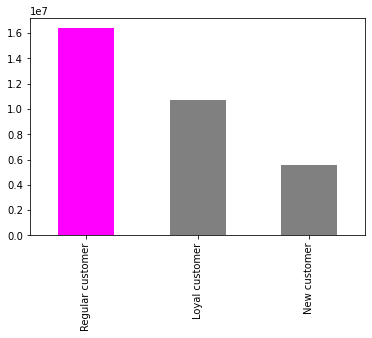

In [48]:
bar_loyalty = df_merged['loyalty_flag'].value_counts().plot.bar(color=['magenta', 'gray', 'gray'])

In [52]:
# Save it
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

## Question 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [5]:
# Create a dataframe containing only the 2 columns needed
df_expenditure = df_merged[['order_time','prices']]

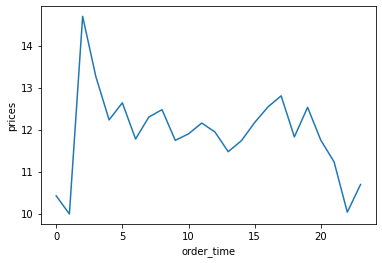

In [6]:
line_exp = sns.lineplot(data = df_expenditure, x = 'order_time',y = 'prices')

### There is a high amount of orders placed around 9-11am. Now that we can see the prices of the items ordered, we can notice that they are low-priced items. 

In [7]:
# Save it
line_exp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_expenditure.png'))

## Question 6: Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. 

In [8]:
# Create a dataframe containing only the 2 columns needed
df_age_dependents = df_merged[['age','num_dependents']]

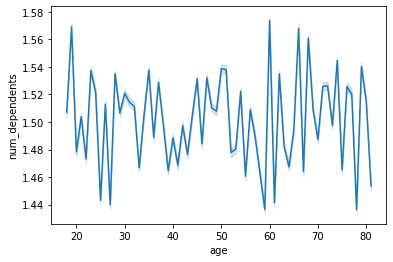

In [9]:
line_dep_age = sns.lineplot(data = df_age_dependents, x = 'age', y = 'num_dependents')

In [10]:
# Save it
line_dep_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependents_age.png'))

### The number of dependents varies between 0 and 3. We can notice that the number of dependents varies with no pattern according to the age of the customers. The mean being 1.5 dependents. 

## Question 7: You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

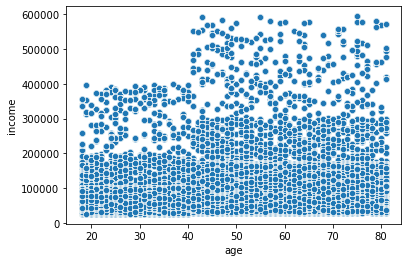

In [59]:
scatter.figure

### Eventhough we cannot see a strong correlation between age and income, we can notice that pople between 18-40 years of age earn at the most 400,000dlls  and most of this subset of pople earn below 200,000dlls. Most people older than 40 year of age have an income below 300,000 and a few customers, 40+ years have a yearly income of 300,000 - 600,000 dlls. 